In [1]:
import pandas
import numpy as np
import pandas as pd

#from __future__ import print_function

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


import matplotlib.pyplot as plt
import matplotlib.cm as cm

%matplotlib inline  
import seaborn as sns


In [2]:

df = pd.read_csv("hUSCensus1990raw50K.csv.bz2",compression = "bz2")



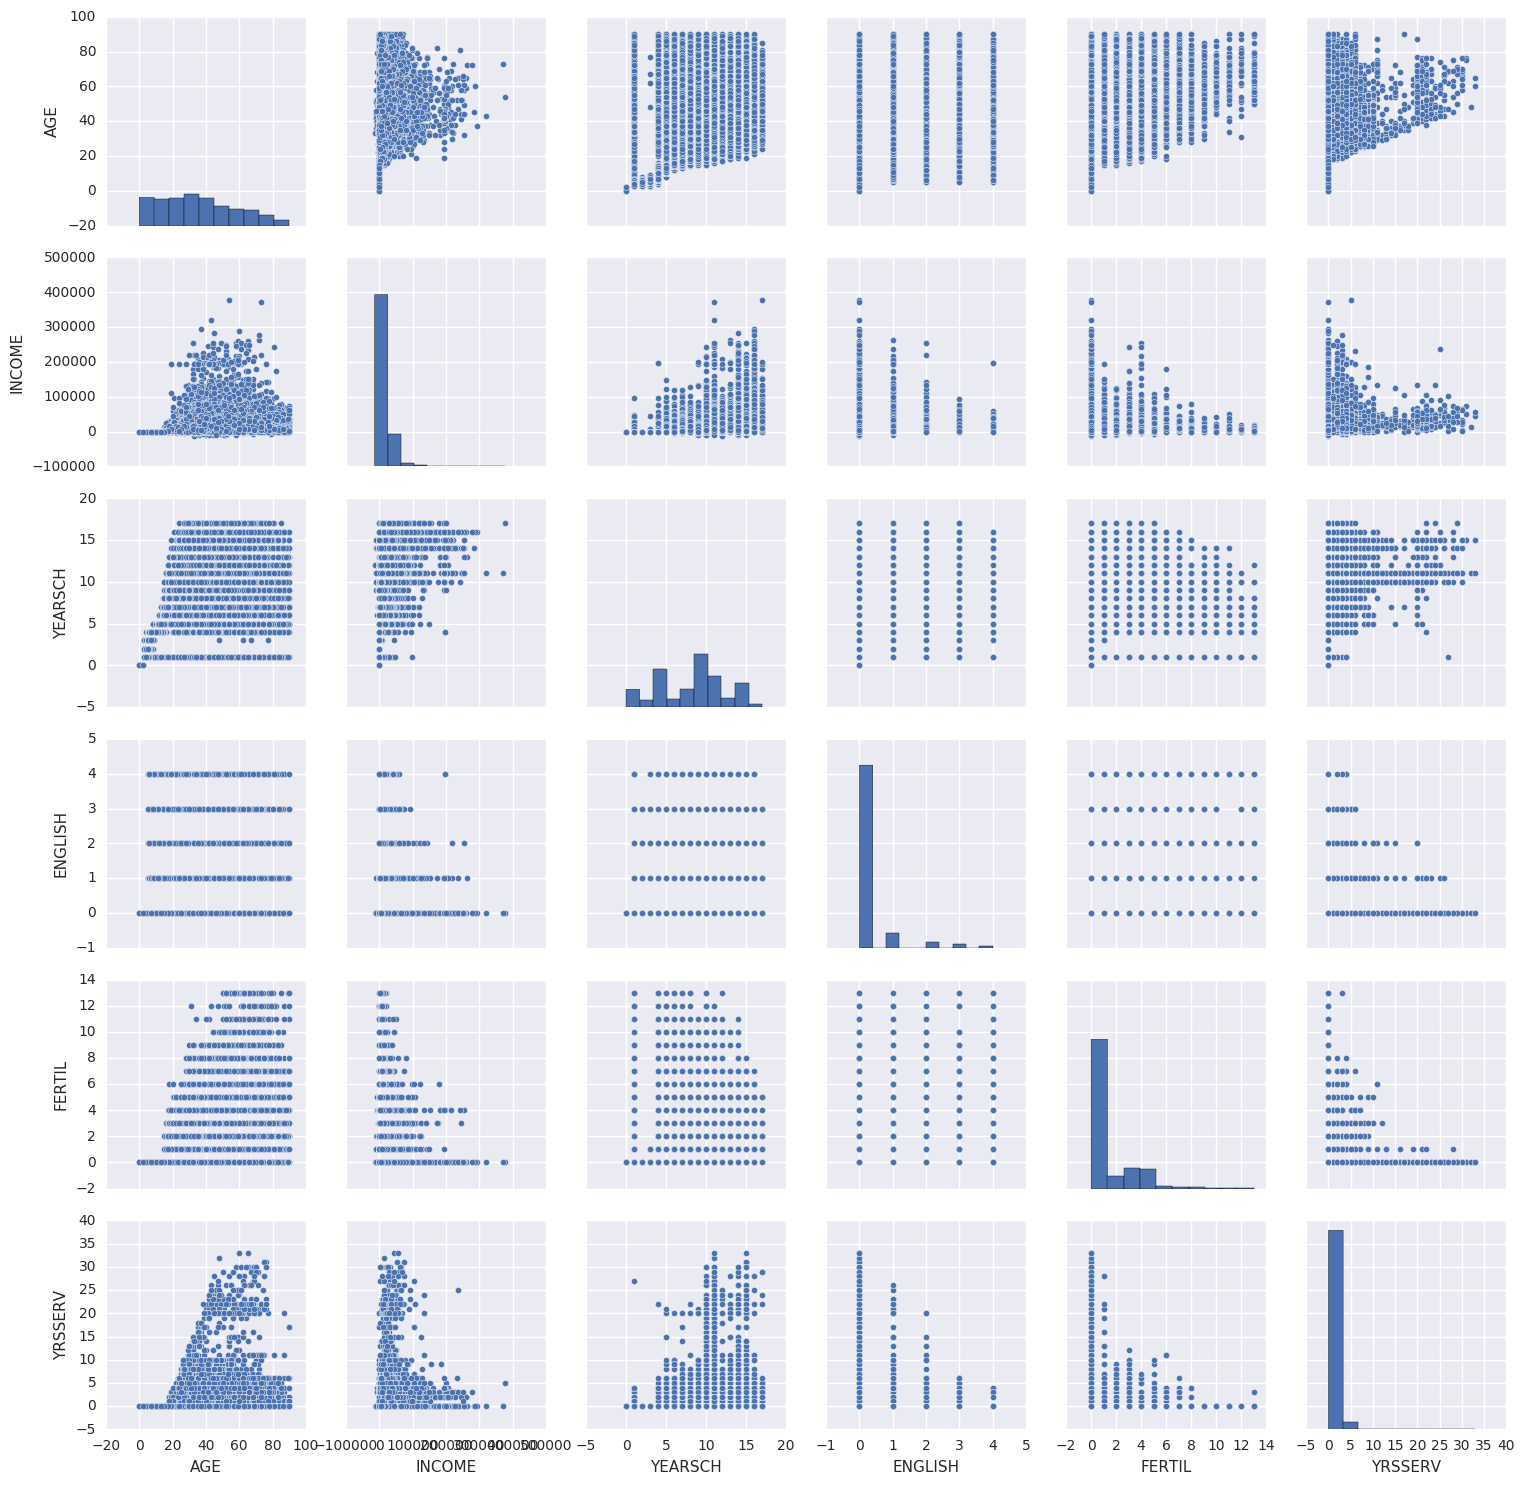

In [3]:
df_demo = pd.DataFrame()


df_demo["AGE"] = df[["AGE"]].copy()
df_demo["INCOME"] = df[["INCOME" + str(i) for i in range(1,8)]].sum(axis = 1)

df_demo["YEARSCH"] = df[["YEARSCH"]].copy()
df_demo["ENGLISH"] = df[["ENGLISH"]].copy()
df_demo["FERTIL"] = df[["FERTIL"]].copy()
df_demo["YRSSERV"] = df[["YRSSERV"]].copy()



#df_demo = pd.get_dummies(df_demo, columns = ["ENGLISH", "FERTIL" ])
#sns.set(style="ticks", color_codes=True)
sns.pairplot(df_demo)



/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


Number of clusters: 2
Silhouette Coefficient: 0.278


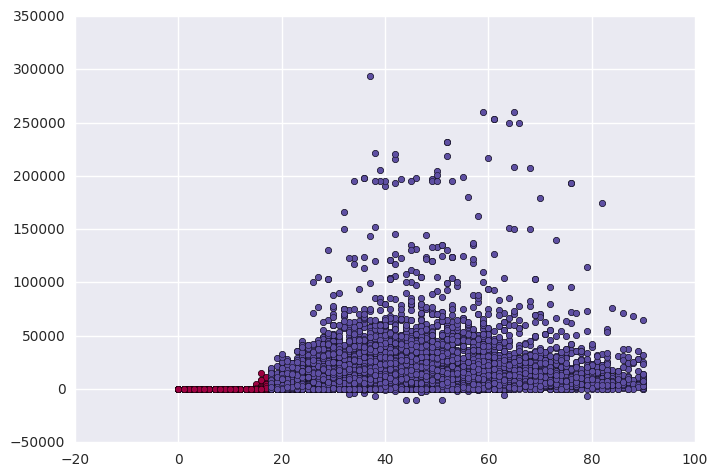

Number of clusters: 3
Silhouette Coefficient: 0.306


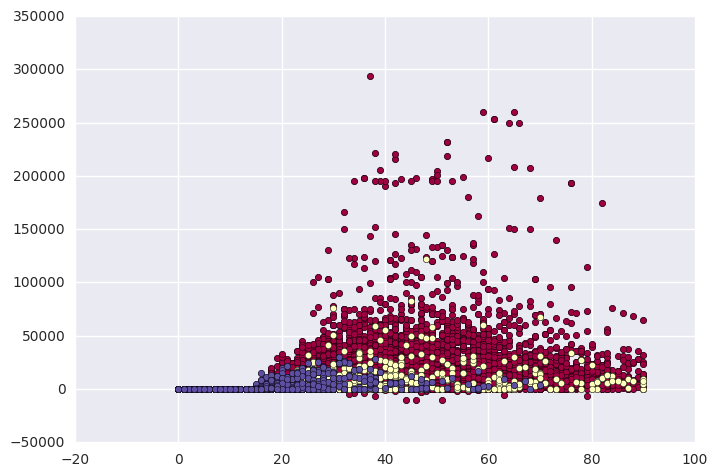

Number of clusters: 4
Silhouette Coefficient: 0.336


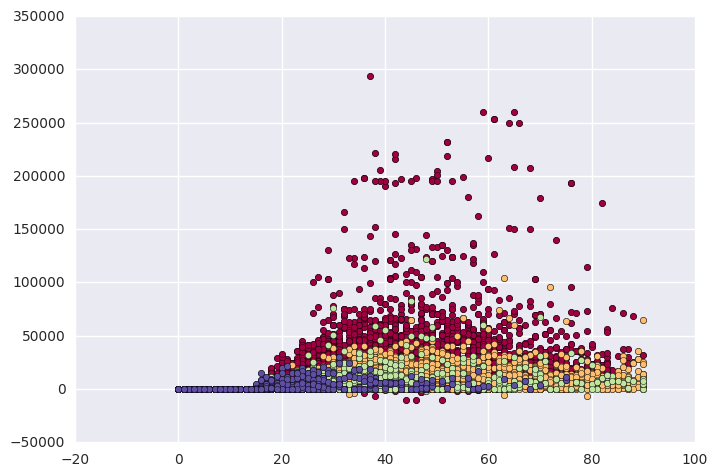

Number of clusters: 5
Silhouette Coefficient: 0.349


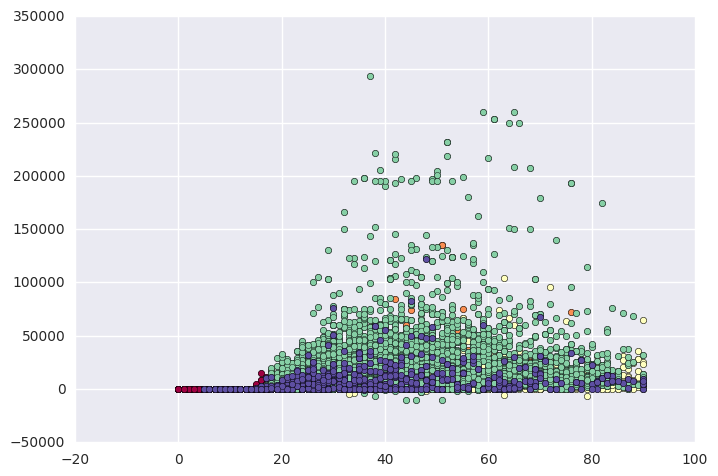

Number of clusters: 6
Silhouette Coefficient: 0.355


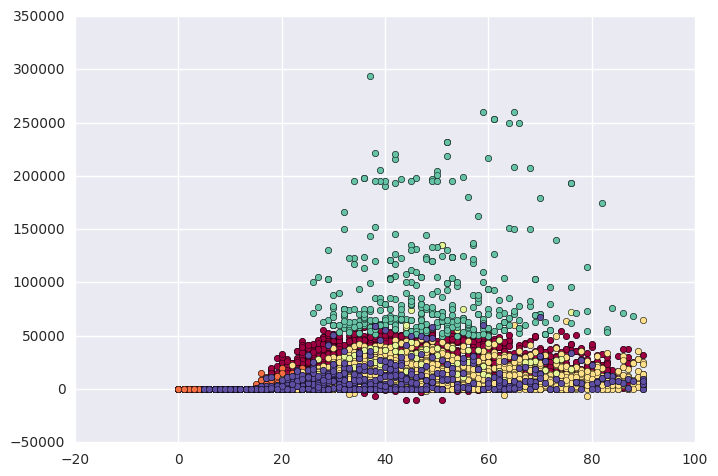

Number of clusters: 7
Silhouette Coefficient: 0.359


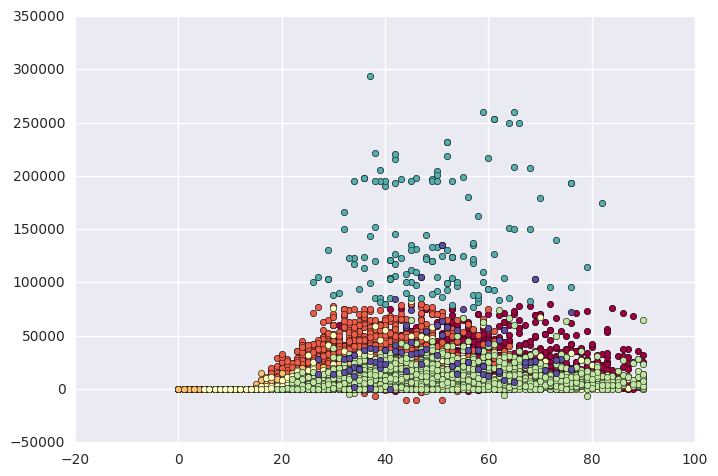

Number of clusters: 8
Silhouette Coefficient: 0.366


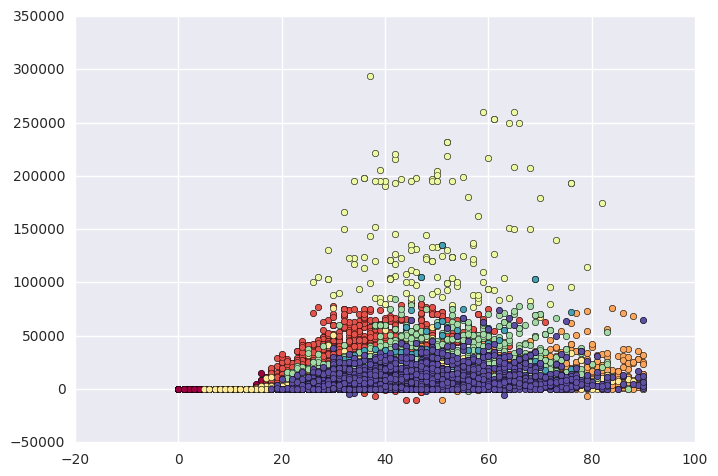

Number of clusters: 9
Silhouette Coefficient: 0.343


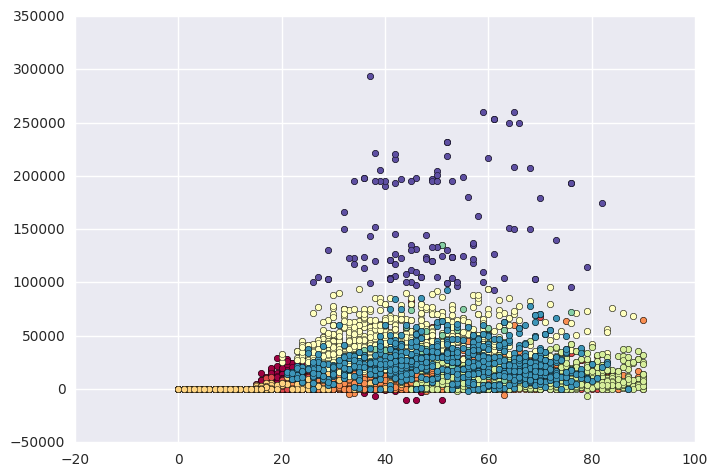

Number of clusters: 10
Silhouette Coefficient: 0.342


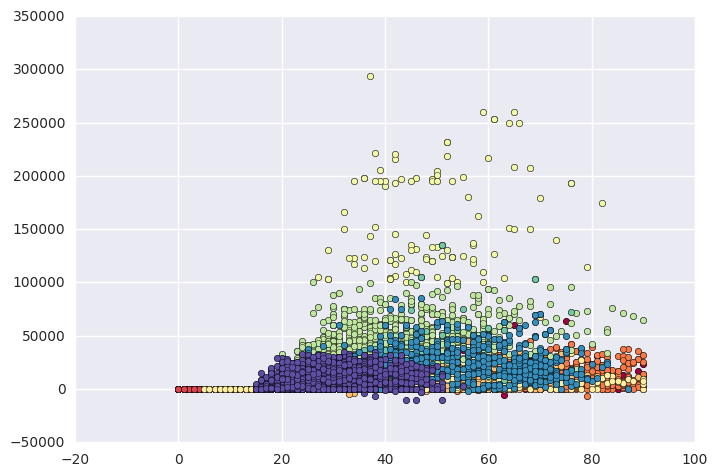

In [4]:
X = df_demo.values[np.random.choice(df_demo.values.shape[0], 10000)]

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_db = sc.fit_transform(X)

for i in range(2,11):
    n_clusters = i

    labels = KMeans(n_clusters = n_clusters).fit_predict(X_db)




    print('Number of clusters: %d' % n_clusters)

    print("Silhouette Coefficient: %0.3f"
          % metrics.silhouette_score(X_db, labels))
    

    unique_labels = set(labels)
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = 'k'

        class_member_mask = (labels == k)

        xy = X[class_member_mask]
        plt.scatter(xy[:, 0], xy[:, 1],  c = col, edgecolor='k')

        xy = X[class_member_mask]
        plt.scatter(xy[:, 0], xy[:, 1],  c = col, edgecolor='k')
    plt.show()


Number of clusters: 2
Silhouette Coefficient: 0.280
Number of clusters: 3
Silhouette Coefficient: 0.307
Number of clusters: 4
Silhouette Coefficient: 0.338
Number of clusters: 5
Silhouette Coefficient: 0.346
Number of clusters: 6
Silhouette Coefficient: 0.357
Number of clusters: 7
Silhouette Coefficient: 0.359
Number of clusters: 8
Silhouette Coefficient: 0.364
Number of clusters: 9
Silhouette Coefficient: 0.343
Number of clusters: 10
Silhouette Coefficient: 0.342
Number of clusters: 2
Silhouette Coefficient: 0.280
Number of clusters: 3
Silhouette Coefficient: 0.307
Number of clusters: 4
Silhouette Coefficient: 0.337
Number of clusters: 5
Silhouette Coefficient: 0.349
Number of clusters: 6
Silhouette Coefficient: 0.353
Number of clusters: 7
Silhouette Coefficient: 0.356
Number of clusters: 8
Silhouette Coefficient: 0.343
Number of clusters: 9
Silhouette Coefficient: 0.347
Number of clusters: 10
Silhouette Coefficient: 0.342
Number of clusters: 2
Silhouette Coefficient: 0.288
Number of 

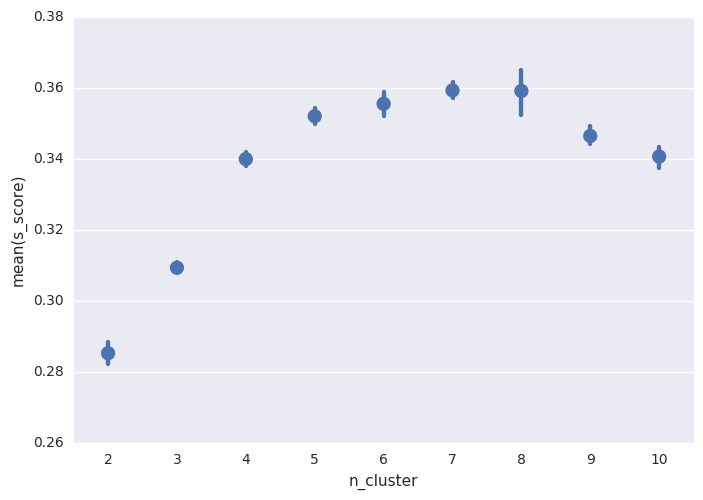

In [10]:
data = []
for j in range(0,10):  
    X = df_demo.values[np.random.choice(df_demo.values.shape[0], 10000)]
    from sklearn import metrics
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_db = sc.fit_transform(X)
    for i in range(2,11):
        n_clusters = i
        labels = KMeans(n_clusters = n_clusters).fit_predict(X_db)        
        s_score = metrics.silhouette_score(X_db,labels)
        data.append ([s_score,i])
        print('Number of clusters: %d' % n_clusters)

        print("Silhouette Coefficient: %0.3f"
          % s_score)
        
df = pd.DataFrame(data)
df.columns = ["s_score","n_cluster"]
sns.pointplot(x ="n_cluster",y ="s_score",data=df, join=False)
        
print(data)

Number of clusters: 2
Silhouette Coefficient: 0.243
Number of clusters: 3
Silhouette Coefficient: 0.293
Number of clusters: 4
Silhouette Coefficient: 0.310
Number of clusters: 5
Silhouette Coefficient: 0.321
Number of clusters: 6
Silhouette Coefficient: 0.331
Number of clusters: 7
Silhouette Coefficient: 0.308
Number of clusters: 8
Silhouette Coefficient: 0.315
Number of clusters: 9
Silhouette Coefficient: 0.311
Number of clusters: 10
Silhouette Coefficient: 0.321
Number of clusters: 2
Silhouette Coefficient: 0.240
Number of clusters: 3
Silhouette Coefficient: 0.292
Number of clusters: 4
Silhouette Coefficient: 0.305
Number of clusters: 5
Silhouette Coefficient: 0.314
Number of clusters: 6
Silhouette Coefficient: 0.320
Number of clusters: 7
Silhouette Coefficient: 0.317
Number of clusters: 8
Silhouette Coefficient: 0.321
Number of clusters: 9
Silhouette Coefficient: 0.330
Number of clusters: 10
Silhouette Coefficient: 0.323
Number of clusters: 2
Silhouette Coefficient: 0.244
Number of 

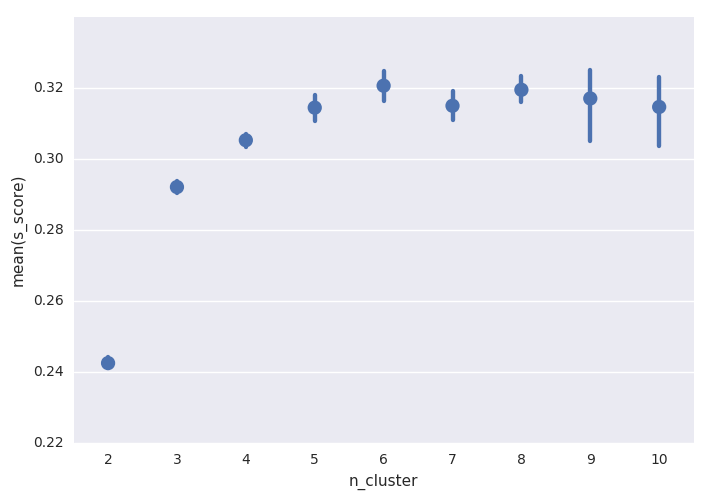

In [13]:
from sklearn.cluster import AgglomerativeClustering
data = []
for j in range(0,10):  
    X = df_demo.values[np.random.choice(df_demo.values.shape[0], 10000)]
    from sklearn import metrics
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_db = sc.fit_transform(X)
    for i in range(2,11):
        n_clusters = i
        labels = AgglomerativeClustering(n_clusters = n_clusters).fit_predict(X_db)        
        s_score = metrics.silhouette_score(X_db,labels)
        data.append ([s_score,i])
        print('Number of clusters: %d' % n_clusters)

        print("Silhouette Coefficient: %0.3f"
          % s_score)
        
df = pd.DataFrame(data)
df.columns = ["s_score","n_cluster"]
sns.pointplot(x ="n_cluster",y ="s_score",data=df, join=False)
        
print(data)